## 作業

1. 請嘗試將資料前處理方式替換成以 min/max 調整後再進行標準化至 -1 ~ 1 間。
2. 請嘗試將 MLP 疊更深(e.g. 5 ~ 10 層)，進行訓練後觀察 learning curve 的走勢。
3. Optional: 請改用 GPU 進行訓練(如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度。

## 參考資料

如何 Debugging：

    檢查程式碼
    養成好的程式撰寫習慣
    欲實作的模型是否合適當前的資料
    確認參數設定
    確認資料結構
    資料是否足夠
    是否有適當的前處理

[PEP 8 - Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/)

[Troubleshooting Deep Neural Networks](http://josh-tobin.com/assets/pdf/troubleshooting-deep-neural-networks-01-19.pdf)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


## 準備資料

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
def normalize_cifar10_data(x, y):
    x = x.reshape((len(x), -1)).astype('float32').T
    x = MinMaxScaler().fit_transform(x).T * 2 - 1
    y = np_utils.to_categorical(y, num_classes=10)
    return x, y

def normalize_result(x, y):
    print('x.shape:', x.shape)
    print('y.shape:', y.shape)

In [4]:
print('Before normalization:')
normalize_result(X_train, y_train)

Before normalization:
x.shape: (50000, 32, 32, 3)
y.shape: (50000, 1)


In [5]:
print('After normalization:')
X_train, y_train = normalize_cifar10_data(X_train, y_train)
X_test, y_test = normalize_cifar10_data(X_test, y_test)
normalize_result(X_train, y_train)

After normalization:
x.shape: (50000, 3072)
y.shape: (50000, 10)


## 定義函數

In [6]:
def show_train_history(train_history, train_hst_name, val_hst_name):
    plt.plot(train_history.history[train_hst_name])
    plt.plot(train_history.history[val_hst_name])
    plt.xlabel('Epoch')
    plt.ylabel(train_hst_name)
    plt.title('Train History')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

## 定義模型

In [7]:
def build_model(x, input_shape, output_units, neuron_numbers=()):
    main_input, hidden_layer = Input(shape=input_shape, name='main_input'), None
    for i, neuron_number in enumerate(neuron_numbers):
        dense_layer = Dense(units=neuron_number, activation='relu', name=f'hidden_layer{i}')
        hidden_layer = dense_layer(hidden_layer) if hidden_layer is not None else dense_layer(main_input)
    main_output = Dense(units=output_units, activation='softmax', name='main_output')(hidden_layer)
    return Model(inputs=[main_input], outputs=[main_output])

## 改變前處理方式並觀看學習曲線的走勢

In [8]:
## 設定超參數
epochs = 100
batch_size = 256
learning_rate = 0.001

## 設定優化器
optimizer = Adam(lr=learning_rate)

In [9]:
model = build_model(X_train, (X_train.shape[-1],), 10, neuron_numbers=(512, 256, 128,))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
main_output (Dense)          (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
train_history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test,),
                          shuffle=True, verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 14s - loss: 1.6427 - acc: 0.4159 - val_loss: 1.5132 - val_acc: 0.4666
Epoch 2/100
 - 13s - loss: 1.4207 - acc: 0.4969 - val_loss: 1.4542 - val_acc: 0.4883
Epoch 3/100
 - 13s - loss: 1.2983 - acc: 0.5413 - val_loss: 1.3769 - val_acc: 0.5157
Epoch 4/100
 - 13s - loss: 1.1988 - acc: 0.5793 - val_loss: 1.3698 - val_acc: 0.5216
Epoch 5/100
 - 13s - loss: 1.1053 - acc: 0.6108 - val_loss: 1.3734 - val_acc: 0.5276
Epoch 6/100
 - 13s - loss: 1.0263 - acc: 0.6385 - val_loss: 1.3904 - val_acc: 0.5250
Epoch 7/100
 - 13s - loss: 0.9413 - acc: 0.6693 - val_loss: 1.3845 - val_acc: 0.5433
Epoch 8/100
 - 13s - loss: 0.8636 - acc: 0.6944 - val_loss: 1.4311 - val_acc: 0.5368
Epoch 9/100
 - 13s - loss: 0.7902 - acc: 0.7211 - val_loss: 1.4976 - val_acc: 0.5353
Epoch 10/100
 - 13s - loss: 0.7074 - acc: 0.7513 - val_loss: 1.5215 - val_acc: 0.5391
Epoch 11/100
 - 13s - loss: 0.6364 - acc: 0.7757 - val_loss: 1.5678 - val_acc: 0.5378
Epoch 12/100


Epoch 96/100
 - 13s - loss: 0.0570 - acc: 0.9822 - val_loss: 4.3907 - val_acc: 0.5311
Epoch 97/100
 - 13s - loss: 0.0570 - acc: 0.9824 - val_loss: 4.4935 - val_acc: 0.5281
Epoch 98/100
 - 13s - loss: 0.0927 - acc: 0.9729 - val_loss: 4.4443 - val_acc: 0.5282
Epoch 99/100
 - 13s - loss: 0.0746 - acc: 0.9768 - val_loss: 4.3681 - val_acc: 0.5252
Epoch 100/100
 - 13s - loss: 0.0593 - acc: 0.9817 - val_loss: 4.3855 - val_acc: 0.5308


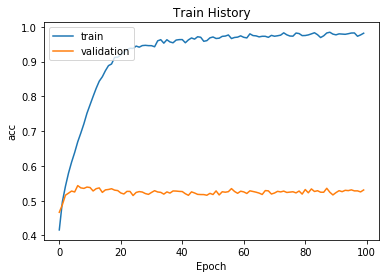

In [12]:
show_train_history(train_history, 'acc', 'val_acc')

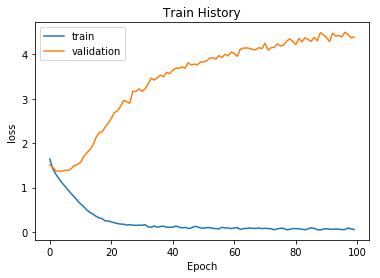

In [13]:
show_train_history(train_history, 'loss', 'val_loss')

## 增加更多隱藏層並觀看學習曲線的走勢

In [14]:
## 設定超參數
epochs = 100
batch_size = 256
learning_rate = 0.001

## 設定優化器
optimizer = Adam(lr=learning_rate)

In [15]:
model = build_model(X_train, (X_train.shape[-1],), 10, neuron_numbers=(1024, 512, 256, 128, 64, 32, 16,))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
__________

In [16]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
train_history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test,),
                          shuffle=True, verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 29s - loss: 1.7909 - acc: 0.3626 - val_loss: 1.6298 - val_acc: 0.4204
Epoch 2/100
 - 29s - loss: 1.5286 - acc: 0.4616 - val_loss: 1.4938 - val_acc: 0.4666
Epoch 3/100
 - 29s - loss: 1.4010 - acc: 0.5077 - val_loss: 1.4287 - val_acc: 0.4964
Epoch 4/100
 - 29s - loss: 1.2835 - acc: 0.5473 - val_loss: 1.4056 - val_acc: 0.5077
Epoch 5/100
 - 29s - loss: 1.1878 - acc: 0.5831 - val_loss: 1.3552 - val_acc: 0.5306
Epoch 6/100
 - 29s - loss: 1.0998 - acc: 0.6124 - val_loss: 1.3570 - val_acc: 0.5375
Epoch 7/100
 - 29s - loss: 1.0071 - acc: 0.6447 - val_loss: 1.3789 - val_acc: 0.5414
Epoch 8/100
 - 29s - loss: 0.9241 - acc: 0.6708 - val_loss: 1.3851 - val_acc: 0.5430
Epoch 9/100
 - 29s - loss: 0.8439 - acc: 0.7030 - val_loss: 1.4320 - val_acc: 0.5470
Epoch 10/100
 - 29s - loss: 0.7595 - acc: 0.7290 - val_loss: 1.5006 - val_acc: 0.5516
Epoch 11/100
 - 29s - loss: 0.6829 - acc: 0.7591 - val_loss: 1.5605 - val_acc: 0.5353
Epoch 12/100


Epoch 96/100
 - 29s - loss: 0.0406 - acc: 0.9876 - val_loss: 3.3847 - val_acc: 0.5438
Epoch 97/100
 - 29s - loss: 0.0380 - acc: 0.9884 - val_loss: 3.3999 - val_acc: 0.5434
Epoch 98/100
 - 29s - loss: 0.0479 - acc: 0.9860 - val_loss: 3.2346 - val_acc: 0.5357
Epoch 99/100
 - 29s - loss: 0.0428 - acc: 0.9872 - val_loss: 3.4743 - val_acc: 0.5441
Epoch 100/100
 - 29s - loss: 0.0505 - acc: 0.9853 - val_loss: 3.4130 - val_acc: 0.5384


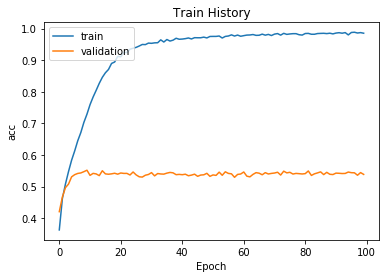

In [18]:
show_train_history(train_history, 'acc', 'val_acc')

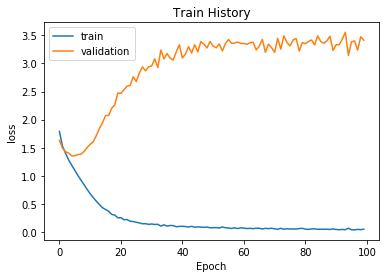

In [19]:
show_train_history(train_history, 'loss', 'val_loss')